## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **The Nobel Prize Dataset**

The Nobel Prize , is a set of annual international awards bestowed in several categories by Swedish and Norwegian institutions in recognition of academic, cultural, or scientific advances.

The will of the Swedish scientist Alfred Nobel established the five Nobel prizes in 1895. The prizes in Chemistry, Literature, Peace, Physics, and Physiology or Medicine were first awarded in 1901.The Nobel Prize is widely regarded as the most prestigious award available in the fields of literature, medicine, physics, chemistry, economics and activism for peace.

Let's start by reading the dataset then exploring if there are any missing values

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
nobel_prize_df = pd.read_csv('https://raw.githubusercontent.com/raneemsultan/DataEngineering-CSEN1095/lab3_draft/Lab3/CSVs/nobel.csv')

Observe the first few rows

In [ ]:
nobel_prize_df.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [ ]:
print(nobel_prize_df.shape)
nobel_prize_df.info()

(969, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  969 non-null    int64 
 1   Category              969 non-null    object
 2   Prize                 969 non-null    object
 3   Motivation            881 non-null    object
 4   Prize Share           969 non-null    object
 5   Laureate ID           969 non-null    int64 
 6   Laureate Type         969 non-null    object
 7   Full Name             969 non-null    object
 8   Birth Date            940 non-null    object
 9   Birth City            941 non-null    object
 10  Birth Country         943 non-null    object
 11  Sex                   943 non-null    object
 12  Organization Name     722 non-null    object
 13  Organization City     716 non-null    object
 14  Organization Country  716 non-null    object
 15  Death Date            617 non-

From the above cell result, we can observe that there are missing values for several columns. Let's start by the Birth Date, and try to understand why is it missing.

In [ ]:
#another way to find the null values

nobel_prize_df.isnull().sum()

Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64

In [ ]:
nobel_prize_df[nobel_prize_df['Birth City'].isnull()]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If we observe the dataframe above, we notice that the `Birth Date`,	`Birth City`,	`Birth Country`,	`Sex`,	`Organization Name`,	`Organization City`,	`Organization Country`,	`Death Date`,`	Death City`, and	`Death Country` are also missing. However, when we check the `Laureate Type` column, we observe that most of them belong to an *Organization*. Hence, those values are missing for a reason.

Therefore, not every value which is missing, we shall impute. What imputation means is infering the missing values from other columns or the same column, through mean,median, and mode for example.

Let's try to analyze another column. That is the `Death Date` column, why doesn't it exist? Is it because the laureates still didn't die, or because the laureate is an organization, or is it because it wasn't recorded?

In [ ]:
nobel_prize_df[((nobel_prize_df['Death Date'].isnull()) & (nobel_prize_df['Laureate Type']!='Organization'))]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
318,1957,Physics,The Nobel Prize in Physics 1957,"""for their penetrating investigation of the so...",1/2,68,Individual,Chen Ning Yang,1922-09-22,"Hofei, Anhwei",China,Male,Institute for Advanced Study,"Princeton, NJ",United States of America,NaN,NaN,NaN
319,1957,Physics,The Nobel Prize in Physics 1957,"""for their penetrating investigation of the so...",1/2,69,Individual,Tsung-Dao (T.D.) Lee,1926-11-24,Shanghai,China,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN
355,1962,Medicine,The Nobel Prize in Physiology or Medicine 1962,"""for their discoveries concerning the molecula...",1/3,373,Individual,James Dewey Watson,1928-04-06,"Chicago, IL",United States of America,Male,Harvard University,"Cambridge, MA",United States of America,NaN,NaN,NaN
393,1967,Chemistry,The Nobel Prize in Chemistry 1967,"""for their studies of extremely fast chemical ...",1/2,233,Individual,Manfred Eigen,1927-05-09,Bochum,Germany,Male,Max-Planck-Institut für Physikalische Chemie,Göttingen,Federal Republic of Germany,NaN,NaN,NaN
417,1969,Physics,The Nobel Prize in Physics 1969,"""for his contributions and discoveries concern...",1/1,90,Individual,Murray Gell-Mann,1929-09-15,"New York, NY",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN
965,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN
966,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN
967,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN


Most of the names mentioned here, are still alive or passed away after this dataset has been released, 2019. So we can assume for instance that those with missing death dates are still alive. That is when we come to calculate the age by subtracting `Birth Date` form the `Death Date` we can replace the null values in the `Death Date` by 2020 to compute the age.

In [ ]:
# To fill NaNs with a certain value use the fillna() method, we can do that under a certain condition
nobel_prize_df['Death Date'] = nobel_prize_df[nobel_prize_df['Laureate Type']!='Organization']["Death Date"].fillna(2020)
nobel_prize_df.loc[967]

Year                                                                 2016
Category                                                          Physics
Prize                                     The Nobel Prize in Physics 2016
Motivation              "for theoretical discoveries of topological ph...
Prize Share                                                           1/4
Laureate ID                                                           929
Laureate Type                                                  Individual
Full Name                                            F. Duncan M. Haldane
Birth Date                                                     1951-09-14
Birth City                                                         London
Birth Country                                              United Kingdom
Sex                                                                  Male
Organization Name                                    Princeton University
Organization City                     

Now let's observe how many Death Dates are still null. Probably, those who are related to an `Organization`.

In [ ]:
nobel_prize_df.isnull().sum()

Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date               30
Death City              370
Death Country           364
dtype: int64

Notice how we went from 300+ missing values to 30 only!

In [ ]:
nobel_prize_df[nobel_prize_df['Laureate Type']=='Organization'].isnull().sum()

Year                     0
Category                 0
Prize                    0
Motivation              19
Prize Share              0
Laureate ID              0
Laureate Type            0
Full Name                0
Birth Date              26
Birth City              26
Birth Country           26
Sex                     26
Organization Name       30
Organization City       30
Organization Country    30
Death Date              30
Death City              28
Death Country           28
dtype: int64

Note that the other 30 missing values are coming from Organization winners

### **Cars Data Set**

Start by reading the dataset related to car models: https://raw.githubusercontent.com/harshitroy2605/missing-value-in-dataset/master/cars.csv

In [ ]:
import pandas as pd
df_cars= pd.read_csv('https://raw.githubusercontent.com/harshitroy2605/missing-value-in-dataset/master/cars.csv', sep=";")
df_cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
3,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US


Let's observe the columns with null values. We have two ways to go. Either by using the `info() `function or by using `isnull().sum()` function 

In [ ]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car           407 non-null    object
 1   MPG           404 non-null    object
 2   Cylinders     407 non-null    object
 3   Displacement  406 non-null    object
 4   Horsepower    405 non-null    object
 5   Weight        406 non-null    object
 6   Acceleration  407 non-null    object
 7   Model         407 non-null    object
 8   Origin        407 non-null    object
dtypes: object(9)
memory usage: 28.7+ KB


In [ ]:
# get the number of missing data points per column
missing_values_count_cars = df_cars.isnull().sum()
#look at the missing value
print(missing_values_count_cars)

Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64


There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

In [ ]:
import numpy as np
# How many total missing values do we have?
# shape returns the dimentionality of a dataframe (rows and columns), can you guess what product will do?
total_cells_cars = np.product(df_cars.shape) 
total_missing_cars = missing_values_count_cars.sum()

# percent of data that is missing
percentage_missign_values_cars = (total_missing_cars/total_cells_cars) * 100
print(percentage_missign_values_cars)

0.19110019110019108


Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

In [ ]:
df_cars_cleaned = df_cars.dropna() #this will drop the rows with null values
df_cars_cleaned.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US
7,Chevrolet Impala,14.0,8,454.0,220.0,4354.,9.0,70,US
8,Plymouth Fury iii,14.0,8,440.0,215.0,4312.,8.5,70,US
9,Pontiac Catalina,14.0,8,455.0,225.0,4425.,10.0,70,US


In [ ]:
df_cars_cleaned_null_cols = df_cars.dropna(axis=1) #this will drop the columns with null values
df_cars_cleaned_null_cols.head()

,Car,Cylinders,Acceleration,Model,Origin
0,STRING,INT,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,8,12.0,70,US
2,Buick Skylark 320,8,11.5,70,US
3,Plymouth Satellite,8,11.0,70,US
4,AMC Rebel SST,8,12.0,70,US


Let's observe how many columns we lost

In [ ]:
print("Columns in original dataset: %d \n" % df_cars.shape[1])
print("Columns with na's dropped: %d" % df_cars_cleaned_null_cols.shape[1])

Columns in original dataset: 9 

Columns with na's dropped: 5


### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

In [ ]:
df_cars_temp = df_cars.fillna(0)

In [ ]:
df_cars_temp.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,0,3693.,11.5,70,US
3,Plymouth Satellite,0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,0,150.0,0,12.0,70,US


However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
current_MPG = df_cars_cleaned.loc[1:,]['MPG']
current_MPG = current_MPG.astype(float)

In [ ]:
mpg_list = current_MPG.sort_values(ascending=True).values.tolist()

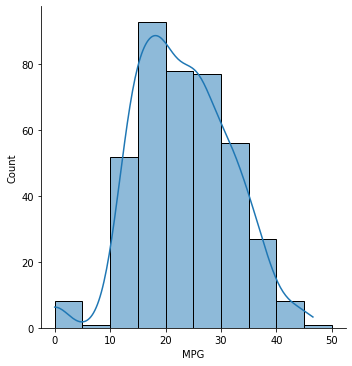

In [ ]:
bins = [0,5,10,15,20,25,30,35,40,45,50]
ax = sns.displot(x=mpg_list,bins=bins,kde=True)
ax.set(xlabel="MPG",ylabel="Count")

If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

In [ ]:
df_cars = df_cars.iloc[1:] #drop the first row from df_cars


In [ ]:
df_cars_cleaned = df_cars_cleaned.iloc[1:] #drop the first row from df_cars_cleaned
df_cars_cleaned

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US
7,Chevrolet Impala,14.0,8,454.0,220.0,4354.,9.0,70,US
8,Plymouth Fury iii,14.0,8,440.0,215.0,4312.,8.5,70,US
9,Pontiac Catalina,14.0,8,455.0,225.0,4425.,10.0,70,US
10,AMC Ambassador DPL,15.0,8,390.0,190.0,3850.,8.5,70,US
...,...,...,...,...,...,...,...,...,...
402,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,US
403,Volkswagen Pickup,44.0,4,97.00,52.00,2130.,24.6,82,Europe
404,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,US
405,Ford Ranger,28.0,4,120.0,79.00,2625.,18.6,82,US


To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

In [ ]:
#convert the following column to float
df_cars_cleaned['MPG'] = df_cars_cleaned['MPG'].astype(float)

Now let's see what is the mean of the MPG column

In [ ]:
np.mean (df_cars_cleaned['MPG'])

23.13416458852868

We can use this mean to compute the missing values since the graph demonstarted a normal distribution

In [ ]:
df_cars['MPG'].fillna((df_cars_cleaned['MPG'].mean()), inplace=True) #inplace doesnt require me to aassign result to a new df

In [ ]:
df_cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,23.1342,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
3,Plymouth Satellite,23.1342,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

In [ ]:
from sklearn.impute import SimpleImputer 

In [ ]:
imputer = SimpleImputer(missing_values = np.nan,  
                        strategy ='median') 

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [ ]:
imputer = imputer.fit(df_cars.iloc[:,1:8]) 

In [ ]:
df_cars.iloc[:,1:8] = imputer.transform(df_cars.iloc[:,1:8])

In [ ]:
df_cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,23.1342,8,307,130,3504,12,70,US
2,Buick Skylark 320,15,8,350,92.5,3693,11.5,70,US
3,Plymouth Satellite,23.1342,8,318,150,3436,11,70,US
4,AMC Rebel SST,16,8,151,150,2815,12,70,US
5,Ford Torino,17,8,302,140,3449,10.5,70,US


### **Data Cleaning Exercise - SF Building permit**


The [Building permits dataset](https://www.kaggle.com/aparnashastry/building-permit-applications-data#Building_Permits.csv) pertains to all types of structural permits from Jan 1, 2013 - Feb 25th 2018 in San Francisco. Data includes details on application/permit numbers, job addresses, supervisorial districts, and the current status of the applications. 

Download the dataset from the link provided and store it in your own data or working folder. Import the dataset in the next cell, and work your way through the steps in the subsequent cells.

1. Import the dataset and observe the first few rows

2. Find out what percent of the building permits dataset is missing.

3. Write a code to check the values of the `Street Number Suffix` and `Zipcode` from the building permits datasets. Both of these contain missing values. Which, if either, of these are missing because they don't exist? Which, if either, are missing because they weren't recorded?

4. See if you can drop the missing values from the building permits dataset and still keep some data, or drop the columns with missing values and see if you have columns still.

5. Try replacing all the `NaN`'s in the building permits data with the one that comes directly after it and then replacing any remaining `NaN`'s with 0. **HINT:** Google `fillna(method = 'bfill')`

6. Create a new dataset at the end with all missing values handled and store as a CSV file.

### **Data Cleaning Exercise 2: Missing value handling on the Pima**

[Pima Indians Diabetes Dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv) involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

There are 768 observations with 8 input variables and 1 output variable. The variable names are as follows:

0. Number of times pregnant.
1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
2. Diastolic blood pressure (mm Hg).
3. Triceps skinfold thickness (mm).
4. 2-Hour serum insulin (mu U/ml).
5. Body mass index (weight in kg/(height in m)^2).
6. Diabetes pedigree function.
7. Age (years).
8. Class variable (0 or 1).

This is a medical dataset, so an important thing we will do with this dataset is that we will see if the statistical summaries can reveal something about the missing values.

1. Import the dataset in the next cell, and work your way through the steps in the subsequent cells.

2. Use the describe method used for pandas data frames to obtain a statistucal summary of the dataset.

3. There are columns that have a minimum value of zero (0). On some columns, a value of zero does not make sense and indicates an invalid or missing value. For example, the `BMI` for a person cannot be 0. See if there are other columns/attributes whose value of 0 does not make sense. An understanding of the medical columns may be needed.

4. Now you can proceed to check the missing values and remove/impute as in exercise 1. Create a new dataset at the ending with all missing values handled and store as a CSV file.

##**References**

**Pictures**


1. https://devbunch.com/blog/6-data-cleaning-steps-to-boost-busin/


**Notebook Resources**
1. [Hadley Wickham - Tidy Data](http://vita.had.co.nz/papers/tidy-data.pdf)
2. [Data Cleaning](https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values)
3. [DSangeetha- Nobel Prize Visualization](https://www.kaggle.com/devisangeetha/nobel-prizes-from-1901)
4. [Simple Imputer](https://www.youtube.com/watch?v=GFnwvZVCMro)
5. [Geeks for Geeks - Simple Imputer](https://www.geeksforgeeks.org/ml-handle-missing-data-with-simple-imputer/)

